In [17]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [18]:
f='/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_daily_resampled_full_9-27-22.nc'
DS_vort_daily=xr.open_dataset(f)
DS_vort_daily

<xarray.Dataset>
Dimensions:                        (lat: 53, lon: 113, time: 3850)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01 ... 2022-...
  * lon                            (lon) float64 -126.2 -125.6 ... -56.88 -56.25
  * lat                            (lat) float64 24.5 25.0 25.5 ... 50.0 50.5
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [19]:
vort_daily=DS_vort_daily['__xarray_dataarray_variable__']
vort_daily

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
[23057650 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [4]:
vort_dc=vort_daily.sel(lat=39,lon=-77,method='nearest')
vort_dc

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850)>
array([-3.777545e-05, -3.810911e-05,  1.096163e-05, ..., -1.159211e-05,
       -1.813235e-05, -3.125092e-05])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lon      float64 -76.88
    lat      float64 39.0

Text(0.5, 1.0, 'Daily vorticity over time for DJF in Washington, DC')

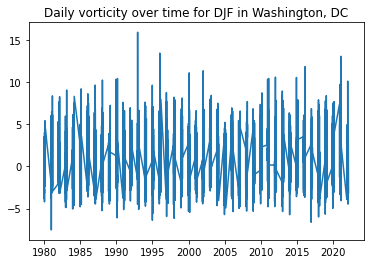

In [5]:
plt.plot(vort_dc['time'],vort_dc*100000)
plt.title('Daily vorticity over time for DJF in Washington, DC')

Text(0.5, 1.0, 'Vorticity valid 01-01-1980')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


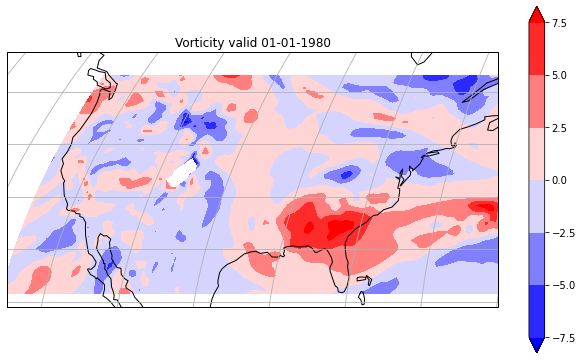

In [6]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(vort_daily['lon'], vort_daily['lat'], vort_daily[0,:,:]*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Vorticity valid 01-01-1980')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/vort_1day_test.png')

KeyboardInterrupt: 

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


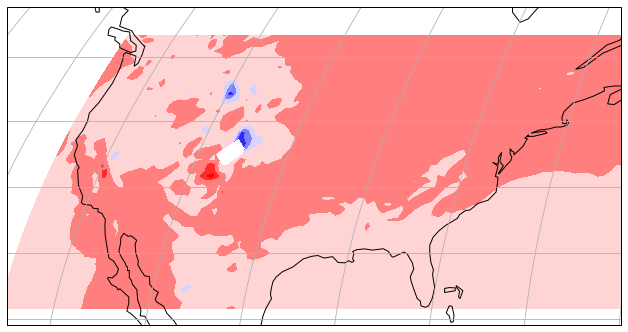

In [7]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(vort_daily['lon'], vort_daily['lat'], vort_daily.mean(dim='time')*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Vorticity Mean for DJF 1980-2022 for CONUS')

### Add boxcar filter to create more robust climatology

In [20]:
window=3
rolling_vort_mean=vort_daily.rolling(time=window).mean(dim='time')
rolling_vort_mean

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
        [            nan,  1.65752008e-06, -4.25446780e-06, ...,
         -7.41064118e-06, -1.09767787e-05,             nan],
        [            nan, -8.69292320e-06, -1.00769753e-05, ...,
         -6.03416777e-06,  8.21521482e-07,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -1.62423946e-05, -1.91238362e-05, ...,
         -5.51217800e-06, -2.43216908e-06,             nan],
        [            nan, -1.82818467e-05, -1.94052904e-05, ...,
          6.31592153e-07,  3.41665522e-06,             nan],
        ...,
        [            nan,  1.63279772e-05,  1.00950389e-05, ...,
         -1.07189261e-06, -1.81111602e-06,             nan],
        [            nan, -3.21773022e-06,  6.80434413e-06, ...,
         -2.94139104e-06,  2.92938323e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [21]:
climo_daily_grouped=rolling_vort_mean.groupby('time.dayofyear').mean(dim='time')
climo_daily_grouped

<xarray.DataArray '__xarray_dataarray_variable__' (dayofyear: 92, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -5.45217315e-06, -4.29355039e-06, ...,
         -1.27367676e-05, -1.23336301e-05,             nan],
        [            nan, -6.38994823e-06, -5.47558044e-06, ...,
         -1.45708031e-05, -1.45726591e-05,             nan],
        ...,
        [            nan,  2.09171831e-06, -1.18665734e-05, ...,
          2.49788356e-05,  2.11736138e-05,             nan],
        [            nan, -1.84998175e-05, -1.17497423e-05, ...,
          2.01551057e-05,  2.57798331e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -6.45068909e-06, -6.00632775e-06, ...,
         -1.25141101e-05, -1.24916606e-05,             nan],
        [            nan, -6.98857838e-06, -6.80939443e-06, ...,
         -1.34338026e-05, -1.36840536e-05,             nan],
...
        [            nan,  3.58507375e-06, -7.58357634e-06, ...,
          1.94258958e-05,  1.55664162e-05,             nan],
        [            nan, -1.63698260e-05, -8.14587294e-06, ...,
          1.43192845e-05,  1.95688464e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  3.61173114e-06,  4.14946161e-06, ...,
         -1.47812178e-05, -1.48723063e-05,             nan],
        [            nan,  1.33649686e-06,  1.08308880e-06, ...,
         -1.57147008e-05, -1.52400296e-05,             nan],
        ...,
        [            nan,  1.01366685e-05, -4.38872309e-06, ...,
          2.52756007e-05,  2.38916990e-05,             nan],
        [            nan, -8.84072634e-06, -2.11540485e-06, ...,
          2.37862467e-05,  3.19353788e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * lon        (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.0 49.5 50.0 50.5
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [25]:
monthly_avgs=vort_daily.groupby('time.month').mean(dim='time')
monthly_avgs

<xarray.DataArray '__xarray_dataarray_variable__' (month: 3, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -6.06604763e-06, -5.96821274e-06, ...,
         -1.32050469e-05, -1.33253518e-05,             nan],
        [            nan, -6.22048750e-06, -6.02838537e-06, ...,
         -1.33288653e-05, -1.35137448e-05,             nan],
        ...,
        [            nan,  7.87934036e-07, -1.13349459e-05, ...,
          1.86793602e-05,  1.47730979e-05,             nan],
        [            nan, -1.97166345e-05, -1.08019735e-05, ...,
          1.36771029e-05,  1.85066679e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -4.60932434e-06, -4.78915297e-06, ...,
         -1.31413866e-05, -1.29575758e-05,             nan],
        [            nan, -4.83454224e-06, -5.01595379e-06, ...,
         -1.30538718e-05, -1.29576988e-05,             nan],
...
        [            nan,  5.02766822e-06, -6.29099617e-06, ...,
          1.74637136e-05,  1.35817281e-05,             nan],
        [            nan, -1.43206096e-05, -6.71444349e-06, ...,
          1.22626921e-05,  1.66588100e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -3.35537778e-06, -3.11032304e-06, ...,
         -9.23287087e-06, -9.19018836e-06,             nan],
        [            nan, -3.75035683e-06, -3.49941479e-06, ...,
         -1.00114370e-05, -9.82558975e-06,             nan],
        ...,
        [            nan,  4.80966909e-06, -7.18542597e-06, ...,
          1.46289118e-05,  1.02709245e-05,             nan],
        [            nan, -1.45866583e-05, -6.31692010e-06, ...,
          1.02459043e-05,  1.43354067e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
  * month    (month) int64 1 2 12

In [26]:
feb_mean=monthly_avgs.sel(month=2)
feb_mean

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan, -4.60932434e-06, -4.78915297e-06, ...,
        -1.31413866e-05, -1.29575758e-05,             nan],
       [            nan, -4.83454224e-06, -5.01595379e-06, ...,
        -1.30538718e-05, -1.29576988e-05,             nan],
       ...,
       [            nan,  5.02766822e-06, -6.29099617e-06, ...,
         1.74637136e-05,  1.35817281e-05,             nan],
       [            nan, -1.43206096e-05, -6.71444349e-06, ...,
         1.22626921e-05,  1.66588100e-05,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    month    int64 2

In [27]:
jan_mean=monthly_avgs.sel(month=1)
jan_mean

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan, -6.06604763e-06, -5.96821274e-06, ...,
        -1.32050469e-05, -1.33253518e-05,             nan],
       [            nan, -6.22048750e-06, -6.02838537e-06, ...,
        -1.33288653e-05, -1.35137448e-05,             nan],
       ...,
       [            nan,  7.87934036e-07, -1.13349459e-05, ...,
         1.86793602e-05,  1.47730979e-05,             nan],
       [            nan, -1.97166345e-05, -1.08019735e-05, ...,
         1.36771029e-05,  1.85066679e-05,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    month    int64 1

In [28]:
diff=feb_mean-jan_mean
diff

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,  1.45672329e-06,  1.17905977e-06, ...,
         6.36602868e-08,  3.67775978e-07,             nan],
       [            nan,  1.38594526e-06,  1.01243158e-06, ...,
         2.74993507e-07,  5.56045986e-07,             nan],
       ...,
       [            nan,  4.23973418e-06,  5.04394969e-06, ...,
        -1.21564662e-06, -1.19136973e-06,             nan],
       [            nan,  5.39602488e-06,  4.08752999e-06, ...,
        -1.41441081e-06, -1.84785791e-06,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


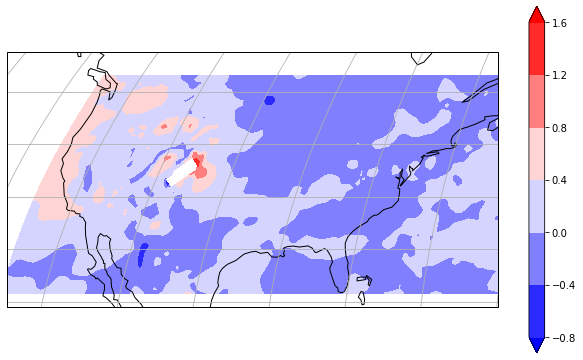

In [29]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(diff['lon'], diff['lat'], diff*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
#us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
#ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
#                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
#plt.title('Vorticity Climatology for DJF 1980-2022 for CONUS')

In [21]:
dc_climo_dayofyear=climo_daily_grouped.sel(lat=39,lon=-77,method='nearest')

Text(0.5, 1.0, 'Robust Vorticity Climatology for each day in Washington DC ')

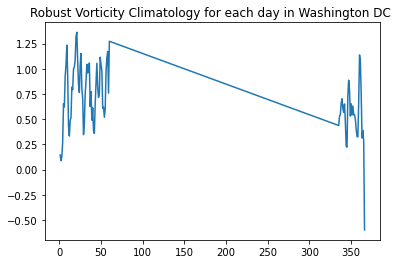

In [11]:
plt.plot(dc_climo_dayofyear['dayofyear'],dc_climo_dayofyear*100000)
plt.title('Robust Vorticity Climatology for each day in Washington DC ')

In [22]:
nyc=climo_daily_grouped.sel(lat=41,lon=-73,method='nearest')

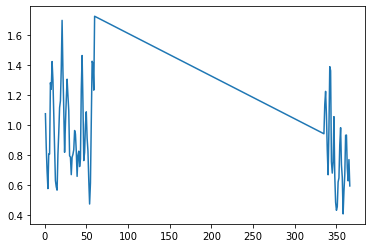

In [23]:
plt.plot(nyc['dayofyear'],nyc*100000)
#plt.title('Robust Vorticity Climatology for each day in Washington DC ')

Text(0.5, 1.0, 'Vorticity Climatology for one day in DJF 1980-2022 for CONUS')

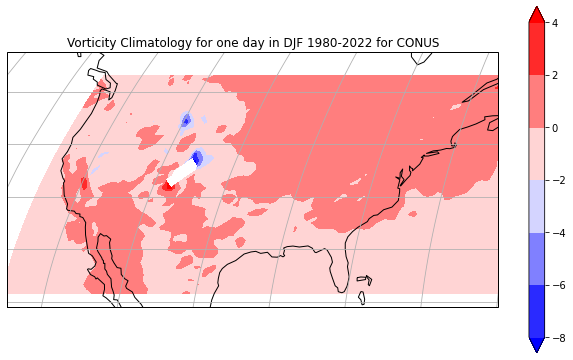

In [19]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(climo_daily_grouped['lon'], climo_daily_grouped['lat'], climo_daily_grouped[,:,:]*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
#us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
#ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  #facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Vorticity Climatology for one day in DJF 1980-2022 for CONUS')

In [8]:
climo_daily_vort=rolling_vort_mean.mean(dim='time')
climo_daily_vort

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan, -4.69037519e-06, -4.62916736e-06, ...,
        -1.18449677e-05, -1.18151505e-05,             nan],
       [            nan, -4.94695216e-06, -4.85224479e-06, ...,
        -1.21230092e-05, -1.20954337e-05,             nan],
       ...,
       [            nan,  3.47313521e-06, -8.35620409e-06, ...,
         1.69359995e-05,  1.28824093e-05,             nan],
       [            nan, -1.62903303e-05, -8.00976653e-06, ...,
         1.20785964e-05,  1.65198469e-05,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

Text(0.5, 1.0, 'Vorticity Climatology for DJF 1980-2022 for CONUS')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


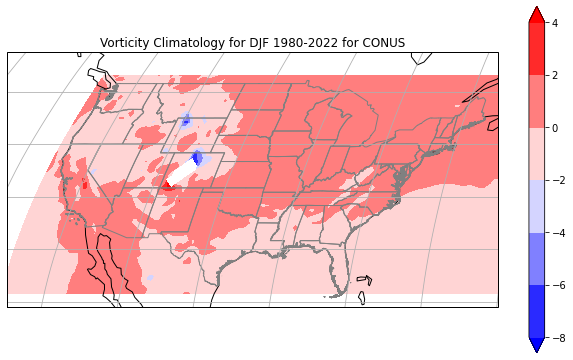

In [14]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(climo_daily_vort['lon'], climo_daily_vort['lat'], climo_daily_vort*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Vorticity Climatology for DJF 1980-2022 for CONUS')

### Anomalies

In [22]:
vort_anoms_traditional=vort_daily.groupby('time.dayofyear')-climo_daily_grouped
vort_anoms_traditional

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  6.76107734e-06,  7.78896974e-06, ...,
          8.32079936e-06,  1.09103005e-05,             nan],
        [            nan,  6.41076958e-06,  7.89072400e-06, ...,
          3.88280579e-06,  5.90543464e-06,             nan],
        ...,
        [            nan,  1.80647592e-05,  2.84598033e-05, ...,
         -2.66623268e-05, -2.64799682e-05,             nan],
        [            nan,  2.40219430e-05,  2.24743591e-05, ...,
         -2.57971477e-05, -2.41500425e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -1.11421567e-05, -1.35595769e-05, ...,
          1.60703297e-05,  2.47753596e-05,             nan],
        [            nan, -1.17116444e-05, -1.27742428e-05, ...,
          1.26494409e-05,  2.29025933e-05,             nan],
...
        [            nan,  2.93634294e-05,  4.23770163e-05, ...,
         -7.29942804e-06, -1.75711603e-05,             nan],
        [            nan,  3.30395023e-05,  3.61045076e-05, ...,
         -1.58355040e-05, -1.20768850e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.14562382e-05,  2.96309941e-06, ...,
          6.78170475e-06,  3.57722611e-06,             nan],
        [            nan,  1.80594485e-06, -2.83782732e-06, ...,
          6.48257381e-06,  7.59955813e-06,             nan],
        ...,
        [            nan,  2.50862181e-05,  2.94480138e-05, ...,
         -1.92137321e-05, -6.62014410e-06,             nan],
        [            nan,  1.47142071e-05,  2.93697889e-05, ...,
         -5.61365466e-06, -5.58966684e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.0 49.5 50.0 50.5
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [23]:
vort_anoms_traditional.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_anoms_traditional_nonorm.nc')

In [14]:
vort_anoms_traditional.std(dim='time')

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan, 1.88231100e-05, 1.89126089e-05, ...,
        1.62094203e-05, 1.62624740e-05,            nan],
       [           nan, 1.90637624e-05, 1.90303375e-05, ...,
        1.67794606e-05, 1.67424257e-05,            nan],
       ...,
       [           nan, 3.19946037e-05, 3.17540049e-05, ...,
        3.12258936e-05, 3.22443257e-05,            nan],
       [           nan, 3.31422213e-05, 3.24424660e-05, ...,
        3.12993072e-05, 3.21504280e-05,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [15]:
vort_anoms_traditional_norm=vort_anoms_traditional/(vort_anoms_traditional.std(dim=('time')))
vort_anoms_traditional_norm

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3850, lat: 53, lon: 113)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,  0.35919024,  0.41184005, ...,  0.51333109,
          0.67088811,         nan],
        [        nan,  0.3362804 ,  0.41463921, ...,  0.2314023 ,
          0.35272276,         nan],
        ...,
        [        nan,  0.56461894,  0.8962587 , ..., -0.85385312,
         -0.82122878,         nan],
        [        nan,  0.72481391,  0.69274509, ..., -0.82420826,
         -0.75115773,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -0.59194026, -0.71695962, ...,  0.99141915,
          1.52346805,         nan],
        [        nan, -0.61434066, -0.67125677, ...,  0.75386458,
          1.36793758,         nan],
...
        [        nan,  0.91776194,  1.33454084, ..., -0.23376202,
         -0.54493806,         nan],
        [        nan,  0.99690066,  1.11287803, ..., -0.50593784,
         -0.37563683,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,  0.60862622,  0.15667322, ...,  0.41838046,
          0.21996814,         nan],
        [        nan,  0.09473182, -0.14912123, ...,  0.38633982,
          0.45391022,         nan],
        ...,
        [        nan,  0.78407654,  0.92737952, ..., -0.61531408,
         -0.20531191,         nan],
        [        nan,  0.44397166,  0.90528842, ..., -0.17935396,
         -0.1738598 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat        (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.0 49.5 50.0 50.5
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [16]:
vort_anoms_traditional_norm.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_norm_anoms_traditional.nc')